In [1]:
import os, sys
root_dir = os.path.dirname(os.getcwd())
sys.path.append(root_dir)

In [2]:
from helper import read_json
from IPython.display import Image
from PIL import Image as PILImage
from matplotlib import pyplot as plt
from load_dataset import load_dataset

/fsx-project/yuchenzeng/anaconda3/envs/meme/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/fsx-project/yuchenzeng/anaconda3/envs/meme/lib/python3.10/site-packages/transformers/utils/hub.py:128: FutureWarning: Using `TRANSFORMERS_CACHE` is deprecated and will be removed in v5 of Transformers. Use `HF_HOME` instead.
  warnings.warn(


In [3]:
def load_results(
    dataset_name, 
    model_name, 
    description = "",
    context = "",
    eval_mode = "single", 
    prompt_name = "standard",
):
    
    if description:
        folder_name = f'description_{description}'
    elif context:
        folder_name = f'context_{context}'
    else:
        folder_name = 'multimodal'
        
    result_dir = f'{root_dir}/results/evaluation/{dataset_name}/{model_name}/{folder_name}/{eval_mode}_{prompt_name}'
    result_files = os.listdir(result_dir)
    results = []
    for result_file in result_files:
        result = read_json(f'{result_dir}/{result_file}')
        results.append(result)
    return results

In [4]:
results = {}

In [5]:
model = 'Qwen2-VL-72B-Instruct'
results[model] = load_results(
    dataset_name = 'relca', 
    model_name = model, 
    description = "",
    context = "",
    eval_mode = 'pairwise', 
    prompt_name = 'standard'
)

/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/289_y-u-no.jpg
/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/6780_guess-who-.jpg


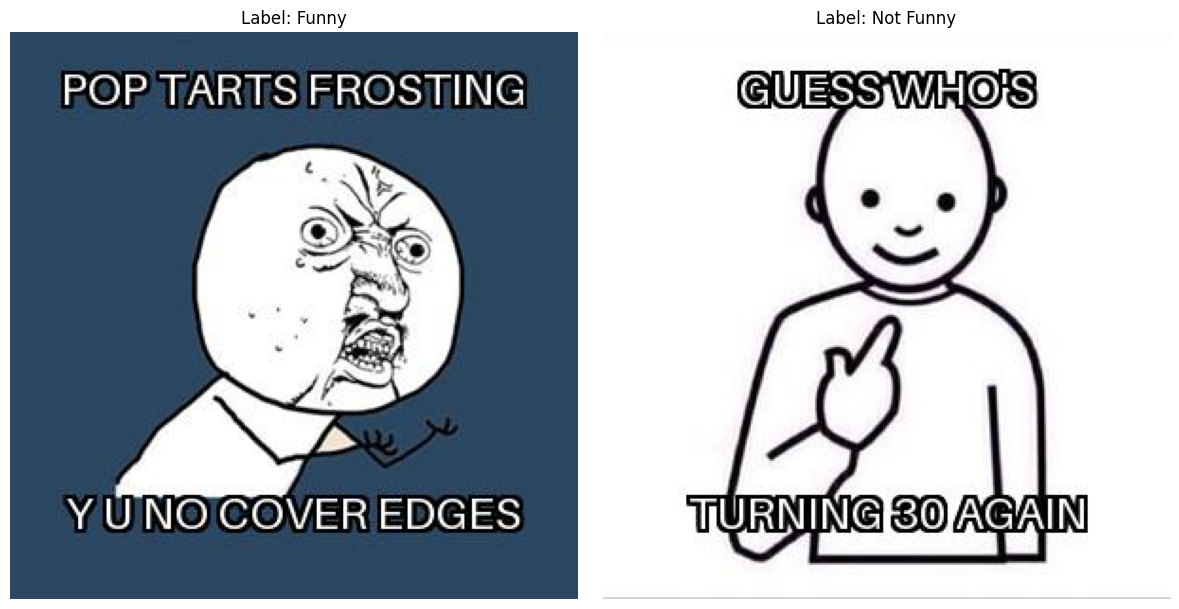

/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/310_so-youre-telling-me.jpg
/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/6883_imagination.jpg


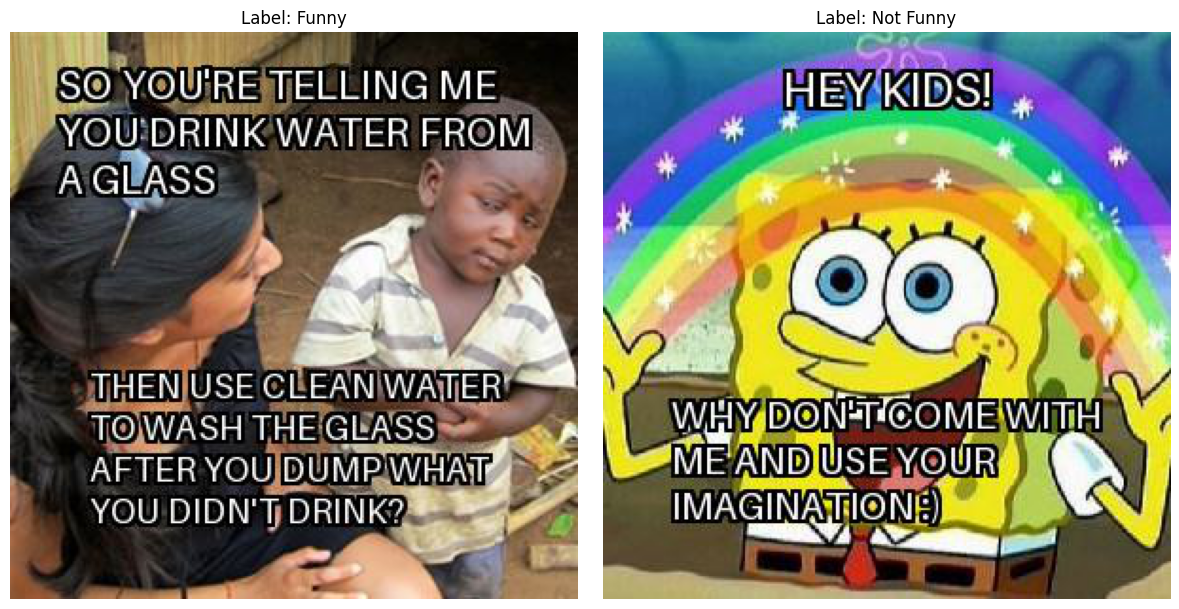

/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/288_skeptical-african-kid.jpg
/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/6727_disaster-girl.jpg


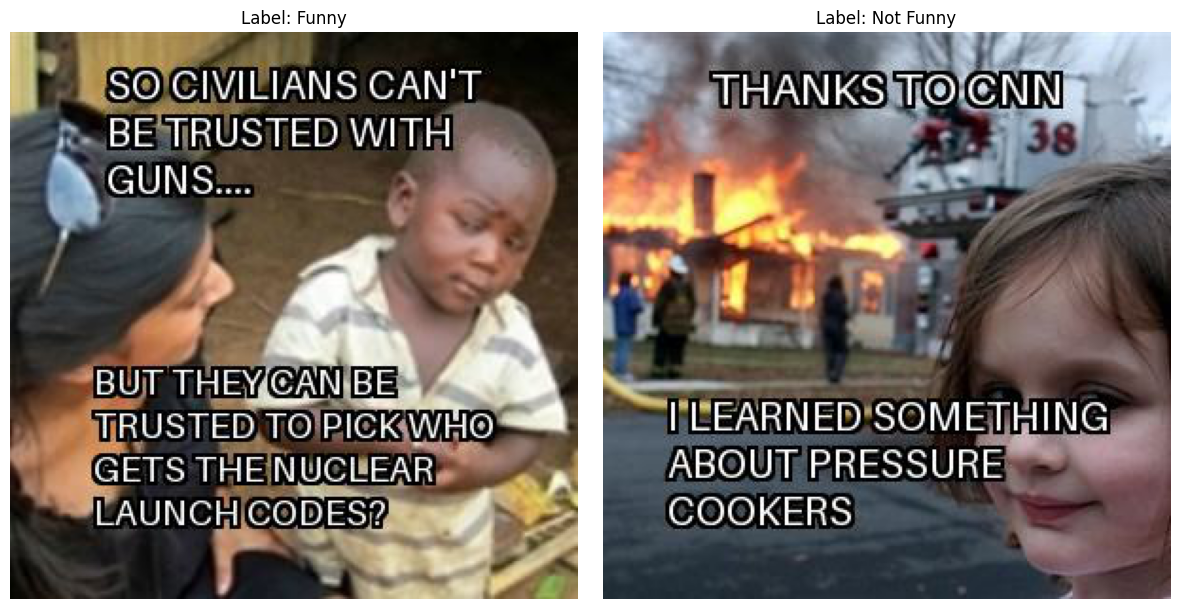

/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/158_overly-attached-girlfriend.jpg
/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/6567_first-world-problems.jpg


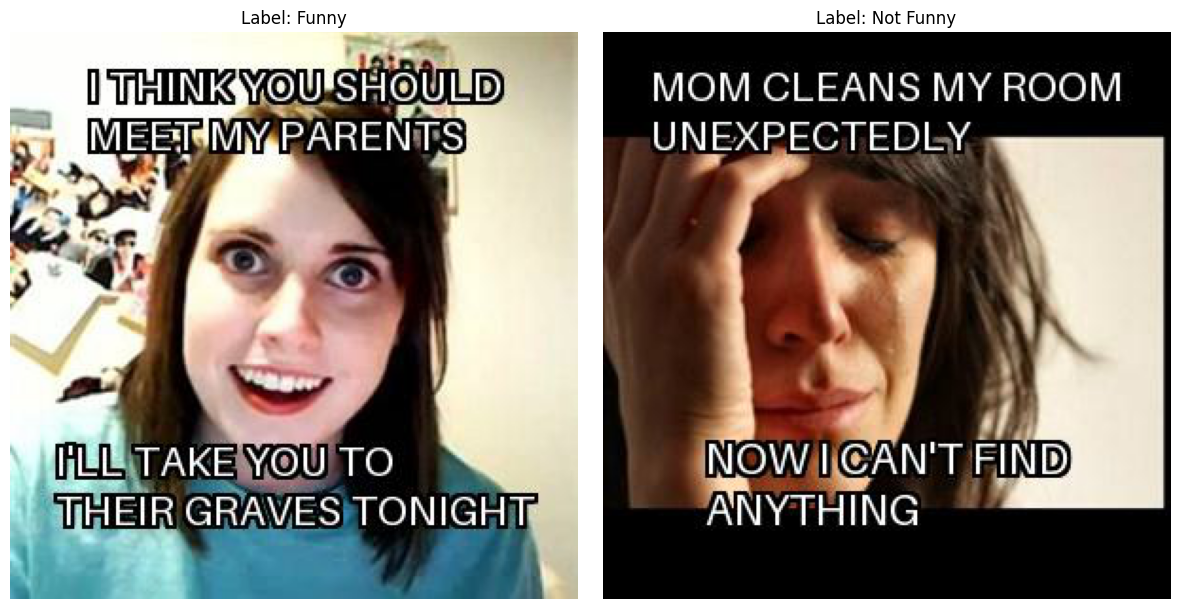

/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/123_african-children-dancing.jpg
/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/6652_stoner-dog.jpg


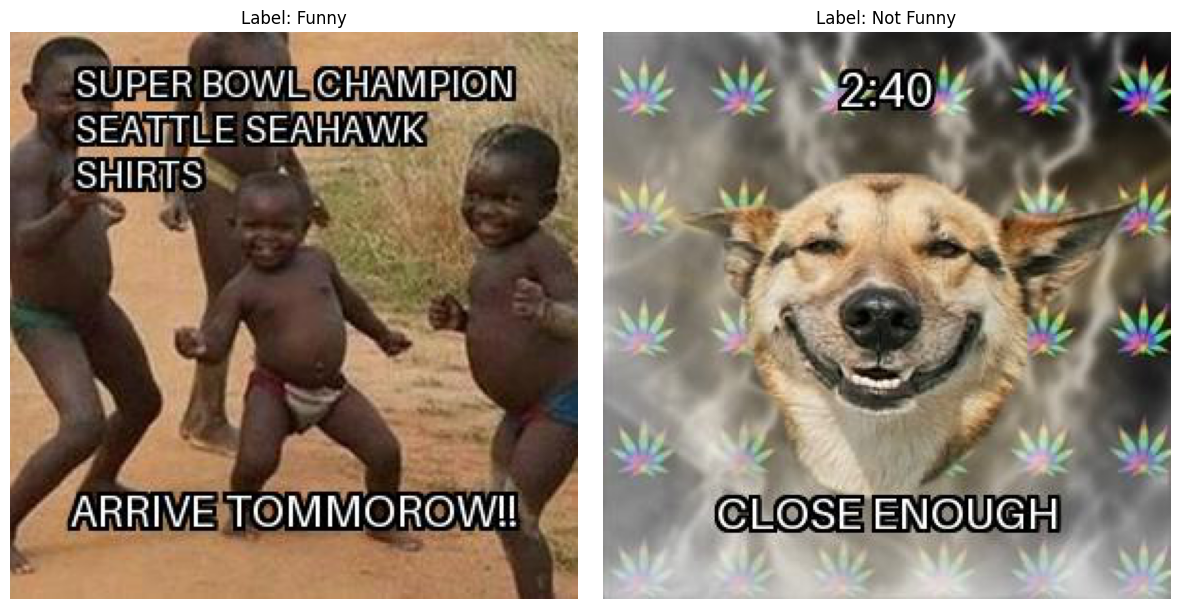

/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/215_overly-attached-girlfriend.jpg
/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/6610_captain-picard.jpg


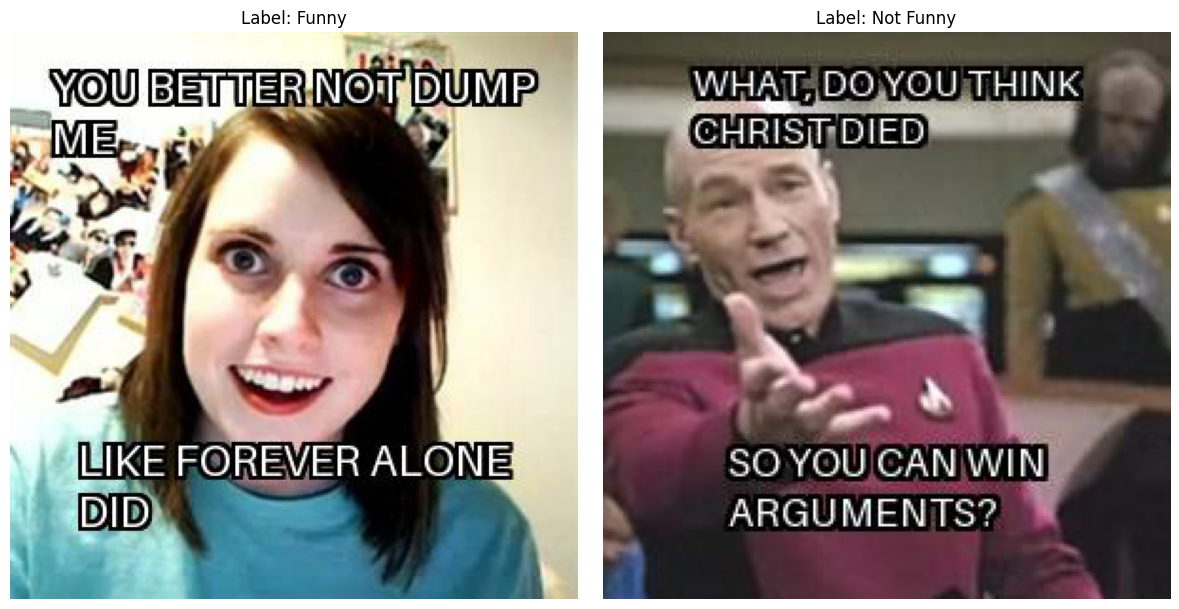

/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/147_so-youre-telling-me.jpg
/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/6813_yo-dawg.jpg


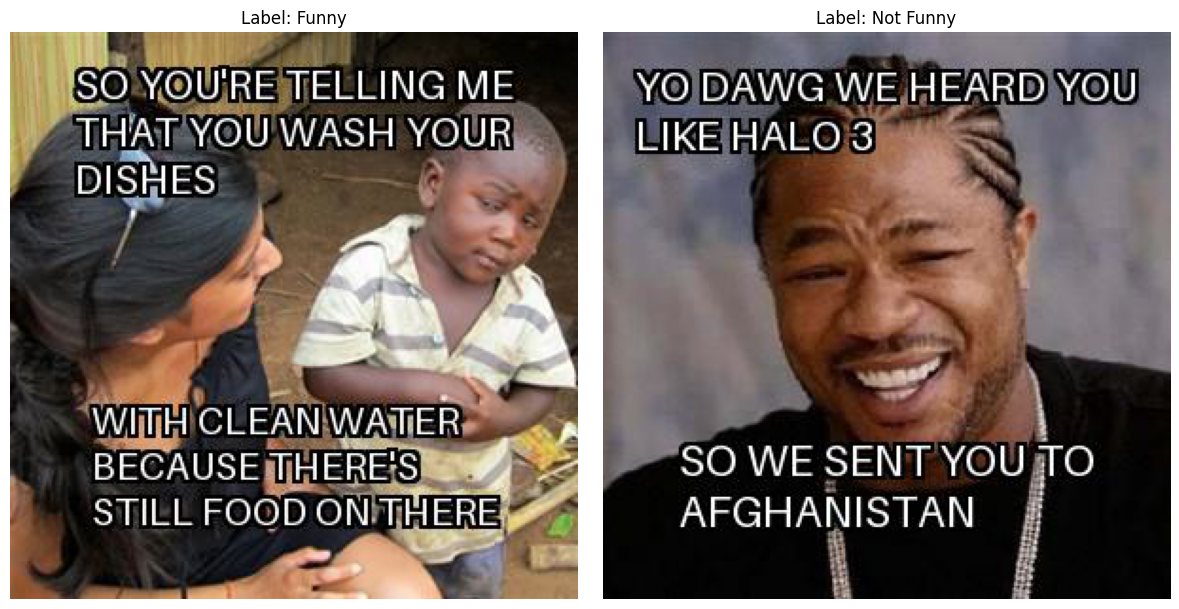

/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/195_forever-alone.jpg
/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/6885_archer.jpg


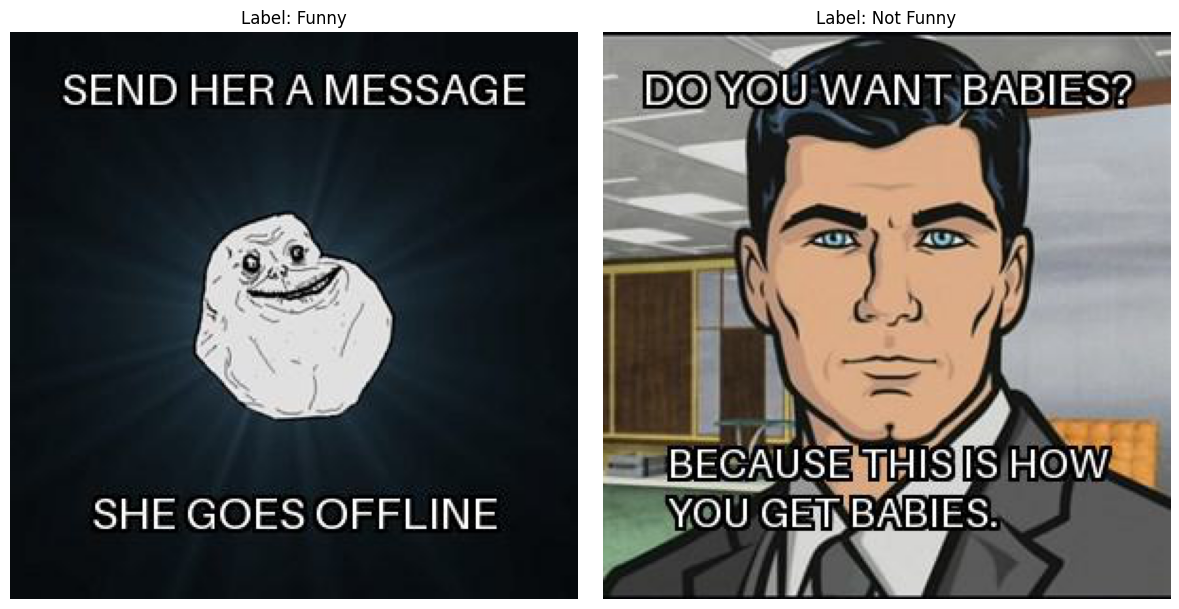

/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/375_really-stoned-guy.jpg
/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/6587_not-sure-if-troll.jpg


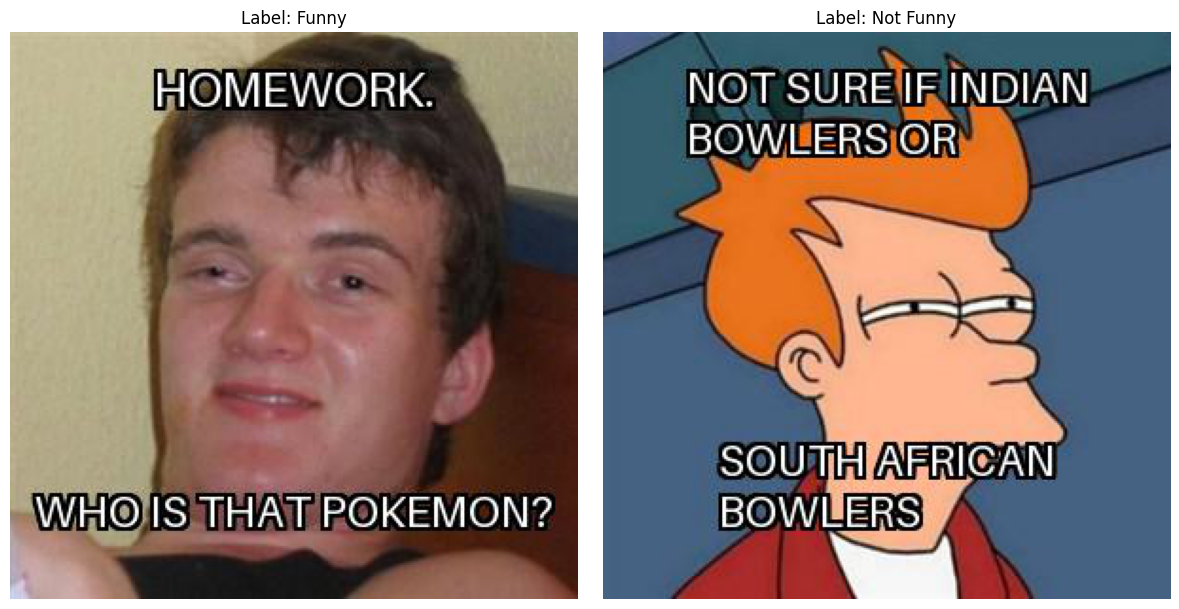

/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/2_socially-awkward-penguin.jpg
/opt/hpcaas/.mounts/fs-06ad2f76a5ad0b18f/yuchenzeng/memeGen/resources/datasets/RelCa/images/6664_winter-is-coming.jpg


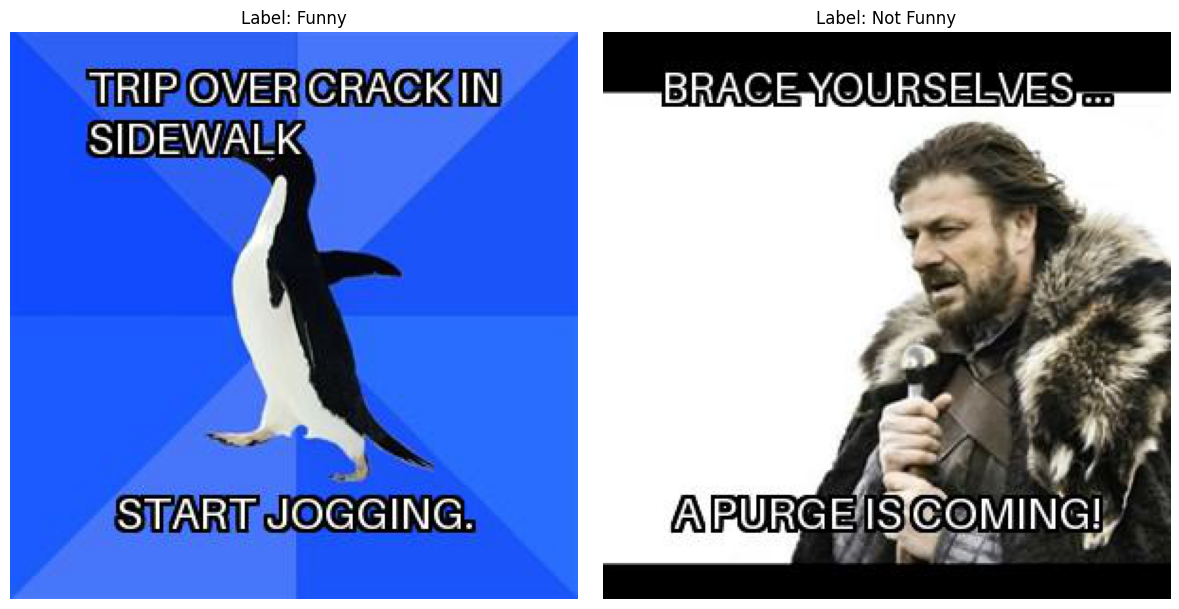

In [7]:
numbers = 10

count = 0
for result in results[model]:
    if (result['pred_label_1'] != result['label_1']) or (result['pred_label_2'] != result['label_2']):
        
        # Create figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        # Load and display first image
        img1 = PILImage.open(result['funny_image_path'])
        print(result['funny_image_path'])
        ax1.imshow(img1)
        ax1.set_title('Label: Funny')
        ax1.axis('off')
        
        # Load and display second image  
        img2 = PILImage.open(result['not_funny_image_path'])
        print(result['not_funny_image_path'])
        ax2.imshow(img2)
        ax2.set_title('Label: Not Funny')
        ax2.axis('off')
        
        plt.tight_layout()
        plt.show()
        count += 1
        if count >= numbers:
            break



In [16]:
model = 'Mixtral-8x22B-Instruct-v0.1'
description = "Llama-3.2-90B-Vision-Instruct"
results[model] = load_results(
    dataset_name = 'relca', 
    model_name = model, 
    description = description,
    context = "",
    eval_mode = 'pairwise', 
    prompt_name = 'standard'
)

dataset = load_dataset('relca', description = description)

In [ ]:
numbers = 10

count = 0
for result in results[model]:
    if (result['pred_label_1'] != result['label_1']) or (result['pred_label_2'] != result['label_2']):
        
        # Create figure with two subplots side by side
        fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))
        
        # Load and display first image
        img1 = PILImage.open(dataset[dataset["description_path"] == result['funny_image_path']]['image_path'].values[0])
        ax1.imshow(img1)
        ax1.set_title('Label: Funny')
        ax1.axis('off')
        
        # Load and display second image  
        img2 = PILImage.open(dataset[dataset["description_path"] == result['not_funny_image_path']]['image_path'].values[0])
        ax2.imshow(img2)
        ax2.set_title('Label: Not Funny')
        ax2.axis('off')
        
        plt.tight_layout()
        plt.show()
        count += 1
        if count >= numbers:
            break

